# Clase 2 — Preprocesamiento de data 
**Objetivo:** Entender *intuitivamente* cómo se comportan las variables, cómo detectar y manejar faltantes, columnas poco útiles, variables correlacionadas, outliers y cómo preparar datos categóricos.

**Idea clave:** Pensá el dataset como una **planilla de Excel**. Cada columna es una variable; cada fila, un caso. Primero entendemos la planilla, **después** modelamos.
se tomo de Kaggle https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data/code

## 0) Configuración y carga de datos

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,4)

# Si tu archivo usa otro nombre/ruta, ajustarlo acá:
CSV_PATH = 'insurance_claims.csv'

# Carga + normalización de marcadores de faltantes
df = pd.read_csv(CSV_PATH, sep= ";")
df = df.replace('?', np.nan)

print('Shape:', df.shape)
df.head(3)

Shape: (1000, 40)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17/10/2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27/6/2006,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,6/9/2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN


## 1) Conocer las variables (como si fuera Excel)

In [14]:
# Tipos de datos y primeras filas
display(df.head(10))
display(df.info())

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17/10/2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27/6/2006,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,6/9/2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25/5/1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12/10/2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,4/6/2000,IN,250/500,1000,1333.35,0,441716,...,NaN,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,3/2/1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,5/2/1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25/7/2011,IL,100/300,500,1315.68,0,600983,...,NaN,42300,4700,4700,32900,Saab,92x,1996,N,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

None

## 2) Faltantes — verlos y decidir

_c39                       1000
property_damage             360
police_report_available     343
collision_type              178
authorities_contacted        91
months_as_customer            0
policy_number                 0
age                           0
policy_annual_premium         0
policy_deductable             0
policy_csl                    0
policy_state                  0
policy_bind_date              0
insured_occupation            0
umbrella_limit                0
insured_zip                   0
capital-gains                 0
insured_relationship          0
incident_date                 0
capital-loss                  0
dtype: int64

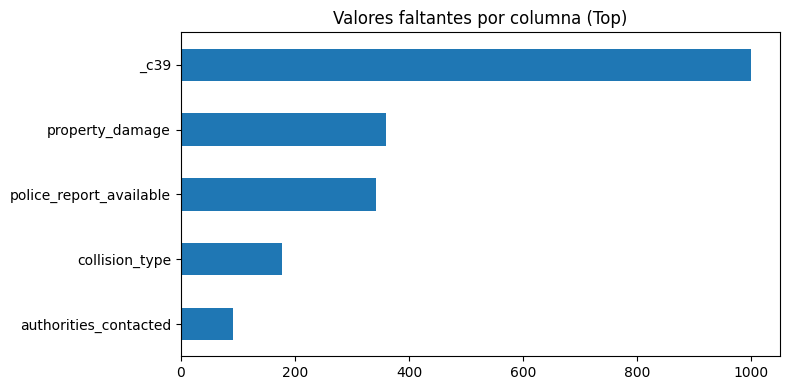

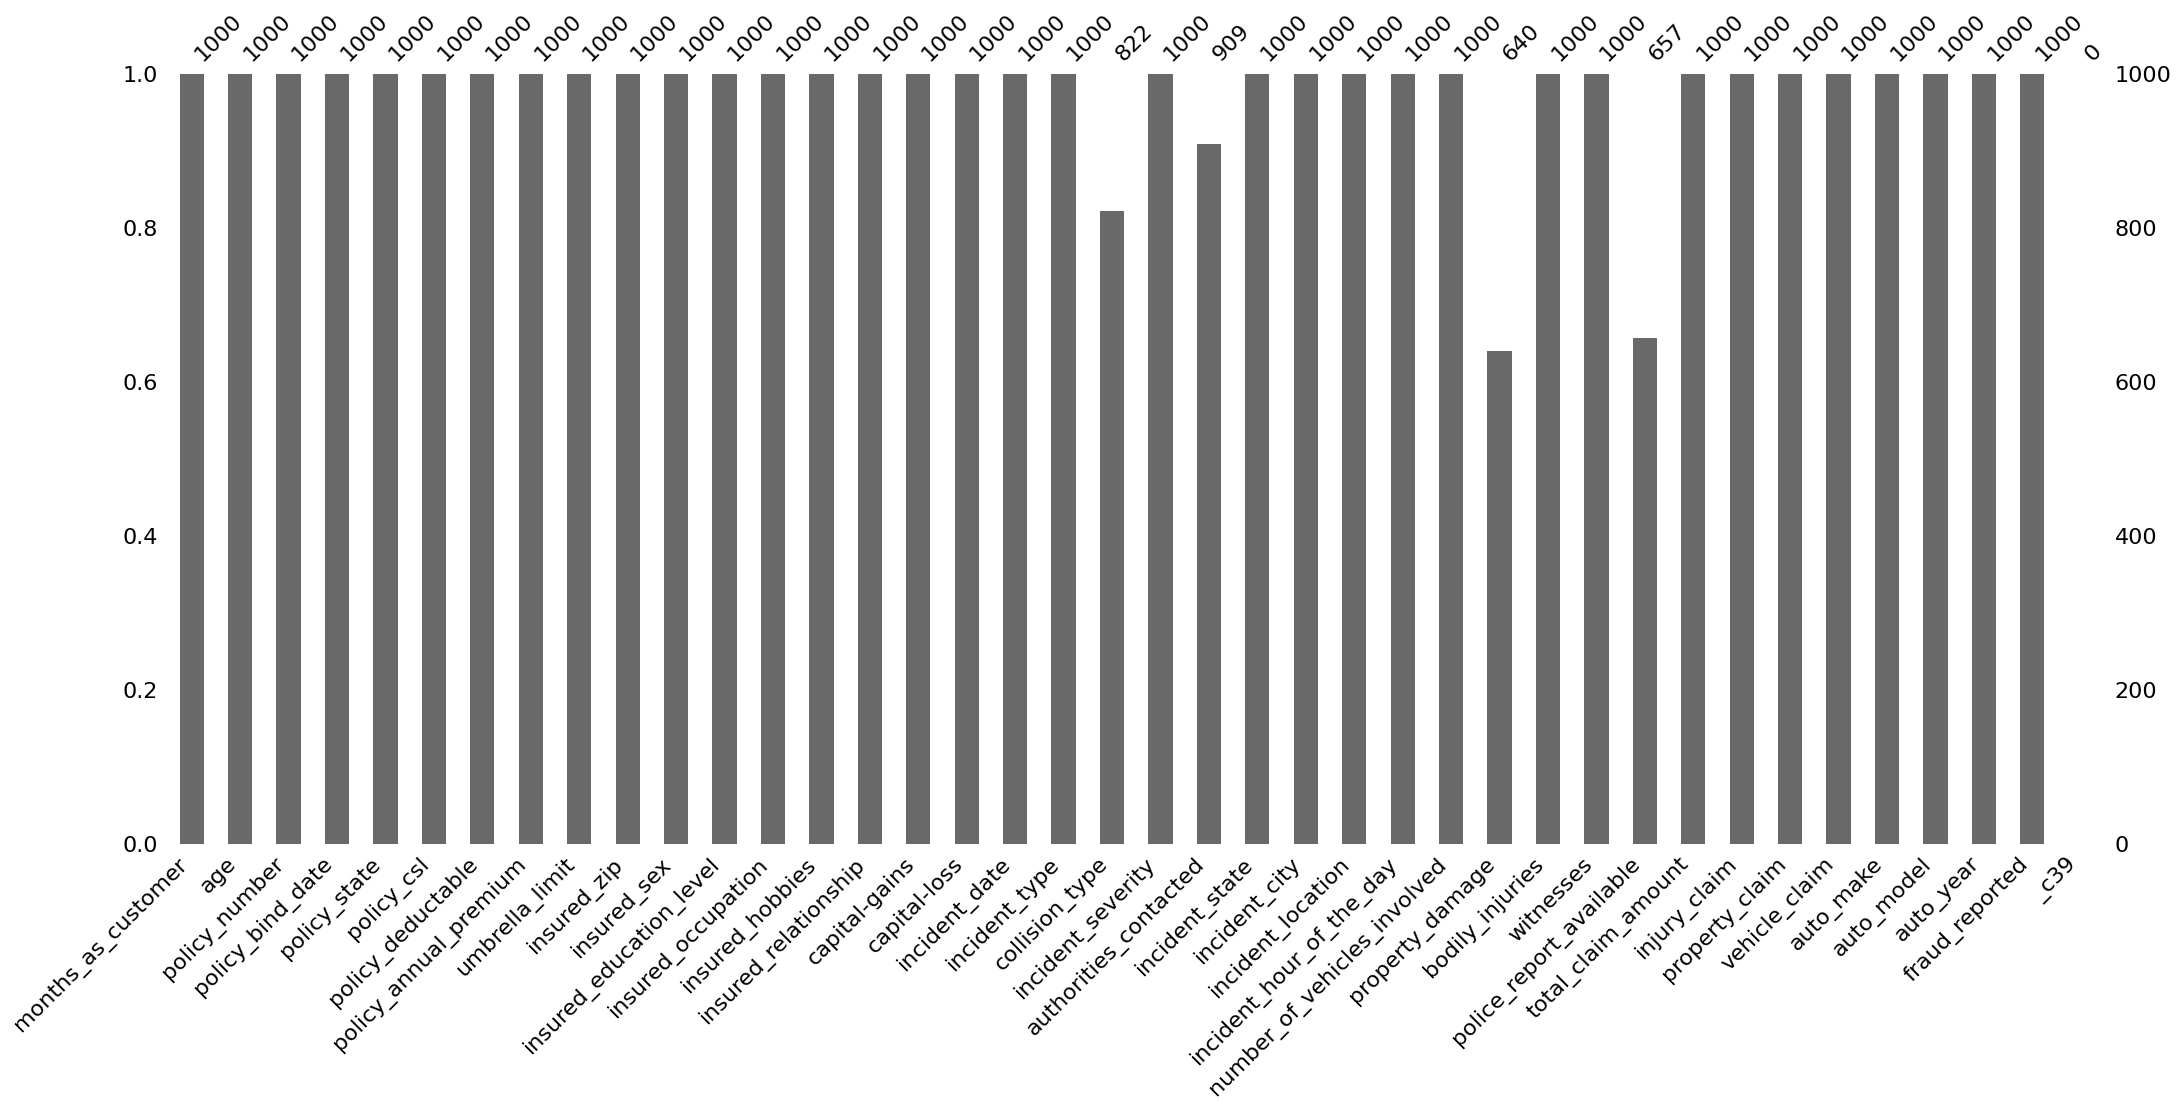

In [15]:
# Conteo de faltantes por columna (top 20)
missing_counts = df.isna().sum().sort_values(ascending=False)
display(missing_counts.head(20))

# Gráfico de barras horizontal para faltantes
top_n = 20 if (missing_counts>0).sum() > 20 else (missing_counts>0).sum()
ax = missing_counts.head(top_n).plot(kind='barh', title='Valores faltantes por columna (Top)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Si tenés installed missingno, descomenta:
try:
    import missingno as msno
    msno.bar(df.sample(min(1000, len(df)), random_state=42))
    plt.show()
except Exception as e:
    print('missingno no disponible o error al mostrar:', e)

### 2.1) Estrategias simples con faltantes

In [16]:
# Copia de trabajo para "antes/después"
df_clean = df.copy()

# a) Drop de columnas con mucha proporción de nulos (ejemplo: >70%)
null_ratio = df_clean.isna().mean()
to_drop = null_ratio[null_ratio > 0.7].index.tolist()
print('Columnas eliminadas por nulos>70%:', to_drop)
df_clean = df_clean.drop(columns=to_drop, errors='ignore')

# b) Imputación simple (numéricos: mediana; categóricos: modo)
num_cols = df_clean.select_dtypes(include=np.number).columns
cat_cols = df_clean.select_dtypes(exclude=np.number).columns

for col in num_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

for col in cat_cols:
    mode_val = df_clean[col].mode(dropna=True)
    if not mode_val.empty:
        df_clean[col] = df_clean[col].fillna(mode_val[0])
    else:
        df_clean[col] = df_clean[col].fillna('Desconocido')

print('Shape original:', df.shape, '| Shape limpio:', df_clean.shape)

Columnas eliminadas por nulos>70%: ['_c39']
Shape original: (1000, 40) | Shape limpio: (1000, 39)


## 3) Columnas poco útiles (IDs, textos irrelevantes)

In [5]:
# Ejemplo: remover IDs/fechas que no aportan al modelo (ajustar a tu dataset)
drop_candidates = ['policy_number', 'policy_bind_date']
df_clean = df_clean.drop(columns=[c for c in drop_candidates if c in df_clean.columns], errors='ignore')
df_clean.head(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y


## 4) ¿Cómo se comportan las variables numéricas? (distribuciones)

Numéricas: ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved'] ... total: 17


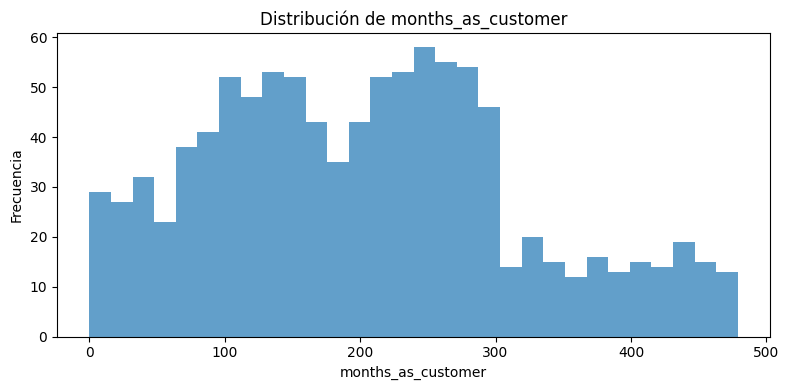

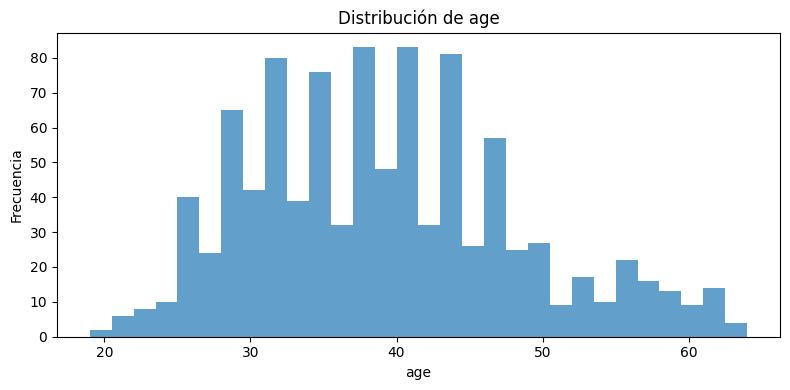

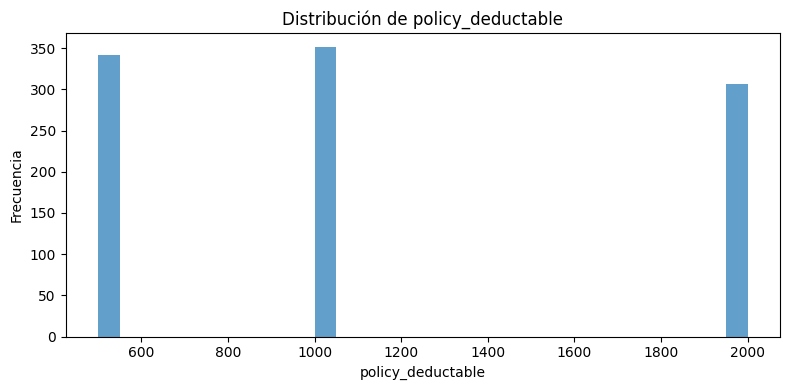

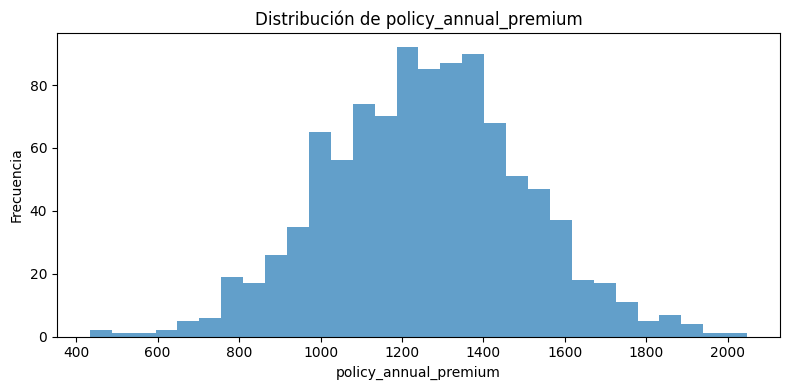

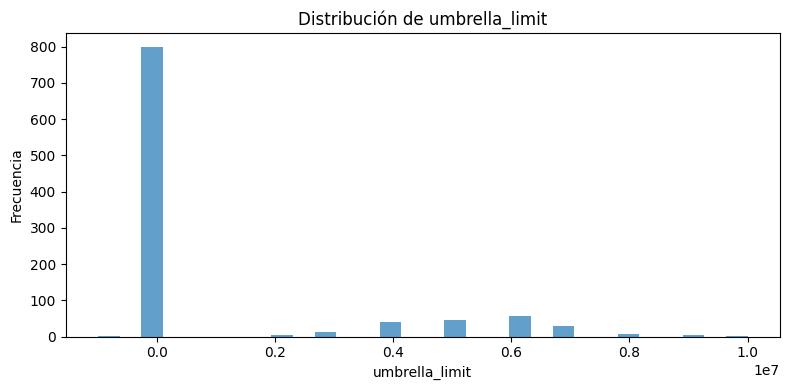

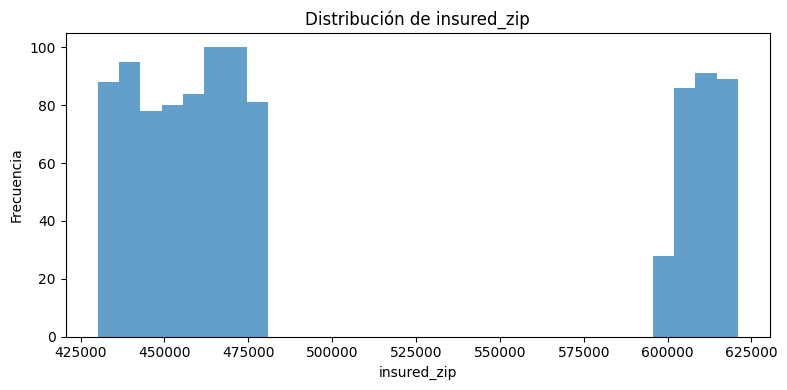

In [6]:
num_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
print('Numéricas:', num_cols[:10], '... total:', len(num_cols))

# Histograma de una selección de variables numéricas (hasta 6 para no saturar)
sel = num_cols[:6]
n = len(sel)
for col in sel:
    df_clean[col].plot(kind='hist', bins=30, alpha=0.7, title=f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

## 5) ¿Cómo se comportan las variables categóricas? (frecuencias)

Categóricas: ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type'] ... total: 20


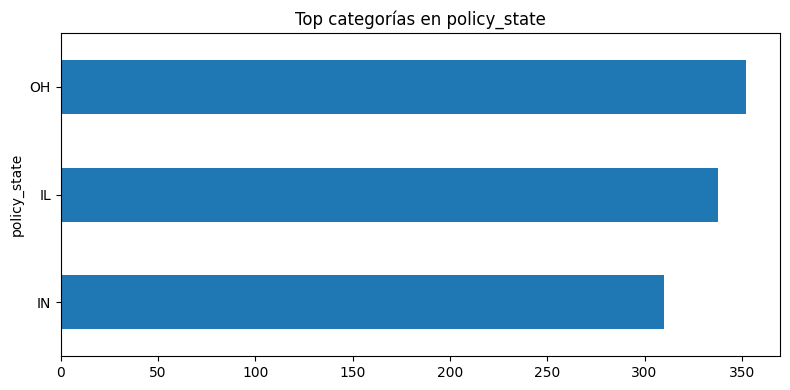

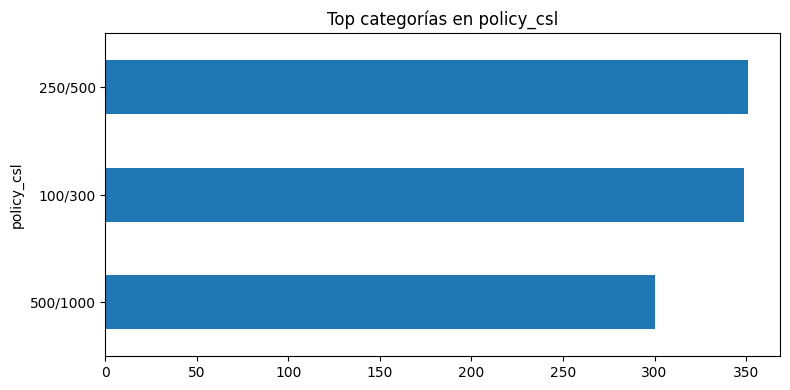

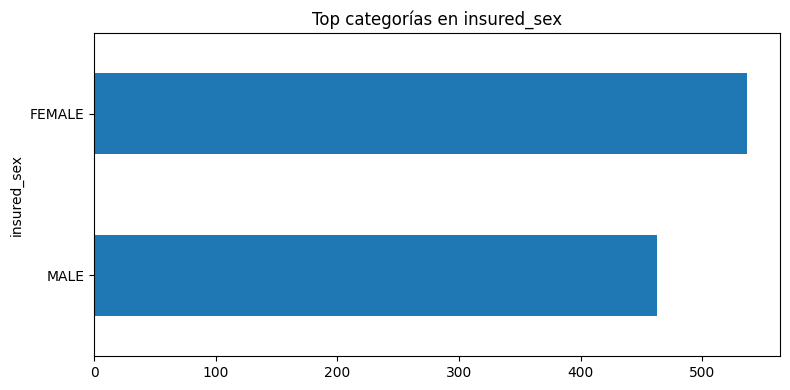

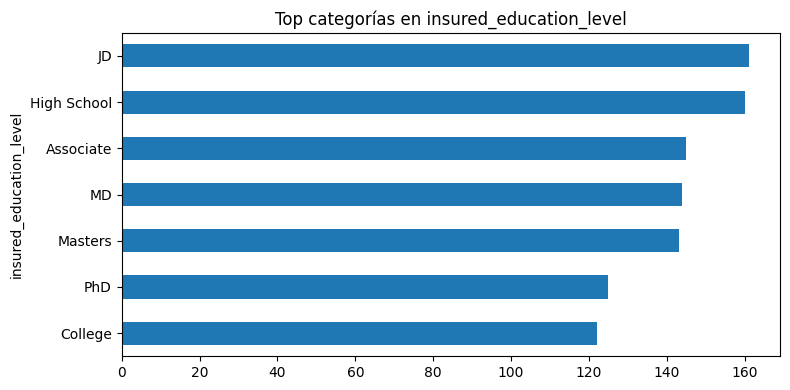

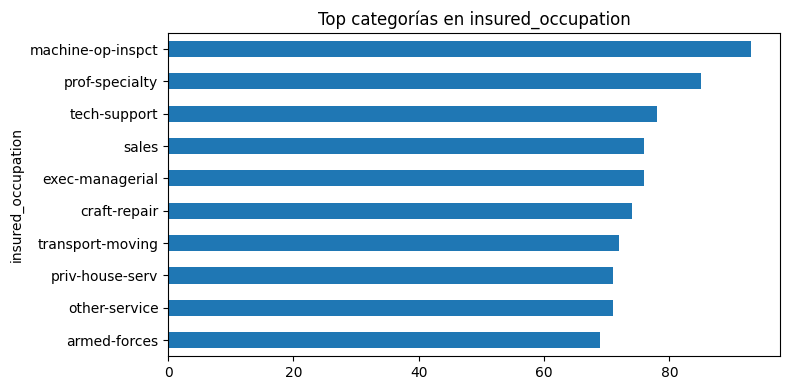

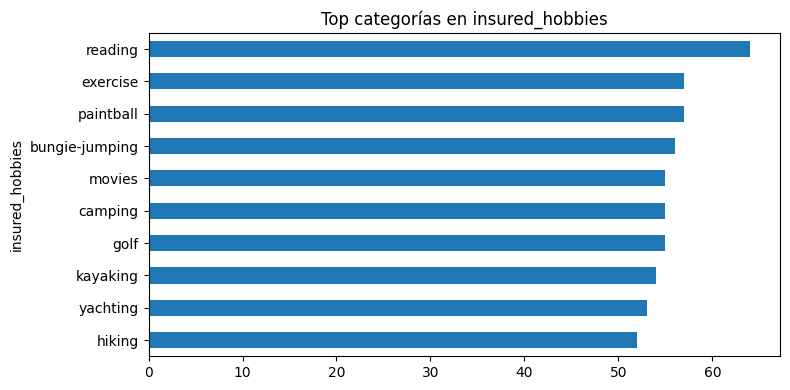

In [7]:
cat_cols = df_clean.select_dtypes(exclude=np.number).columns.tolist()
print('Categóricas:', cat_cols[:10], '... total:', len(cat_cols))

# Top categorías (hasta 6 columnas para demo)
sel = cat_cols[:6]
for col in sel:
    vc = df_clean[col].value_counts().head(10)
    ax = vc.plot(kind='barh', title=f'Top categorías en {col}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

## 6) Correlaciones y multicolinealidad (numéricas)
Usamos **pandas** + **matplotlib** para un heatmap simple.  
> En el ejemplo, se removió `age` por alta correlación con `months_as_customer`, y `total_claim_amount` por ser suma de otras columnas de claim.

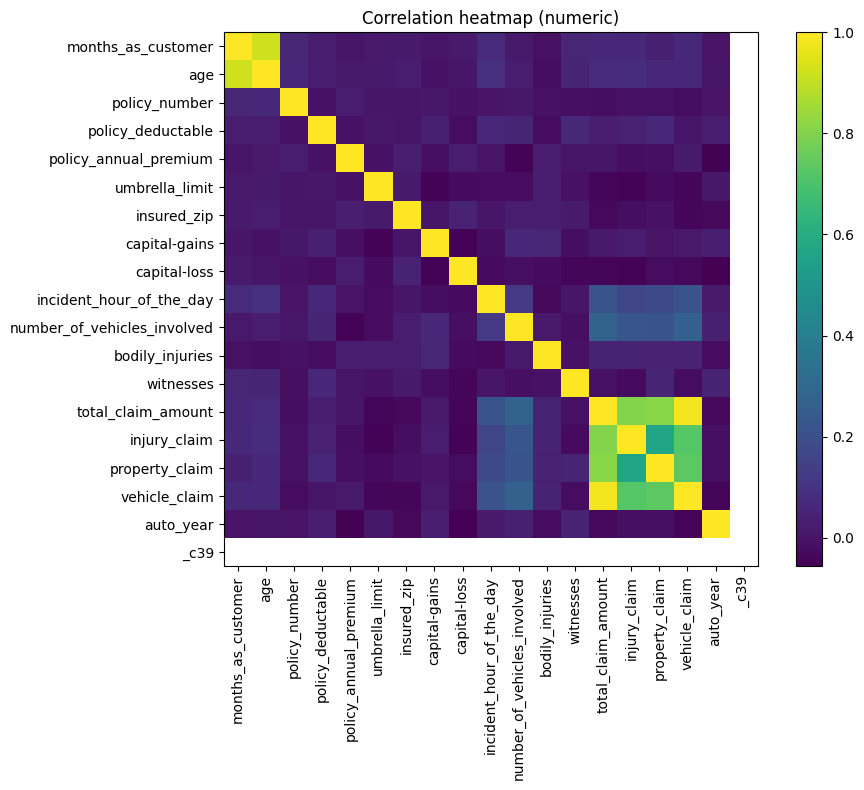

Cols eliminadas si existían: ['age','total_claim_amount']


In [8]:
# Seleccionamos solo numéricas
num_df = df.select_dtypes(include=[np.number])

# Matriz de correlación
corr = num_df.corr()

# Heatmap simple con matplotlib (sin seaborn)
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.imshow(corr, interpolation='nearest')
ax.set_title("Correlation heatmap (numeric)")
fig.colorbar(cax)

# Ticks y etiquetas
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
plt.tight_layout()
plt.show()

# Ejemplo de drops por colinealidad/definición del problema (ajustá según análisis)
for col in ['age', 'total_claim_amount']:
    if col in df.columns:
        df = df.drop(columns=[col])
print("Cols eliminadas si existían: ['age','total_claim_amount']")

## 7) Outliers: valores muy alejados

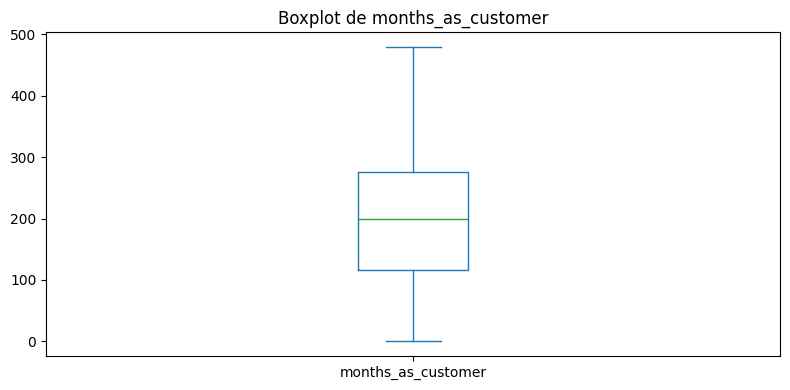

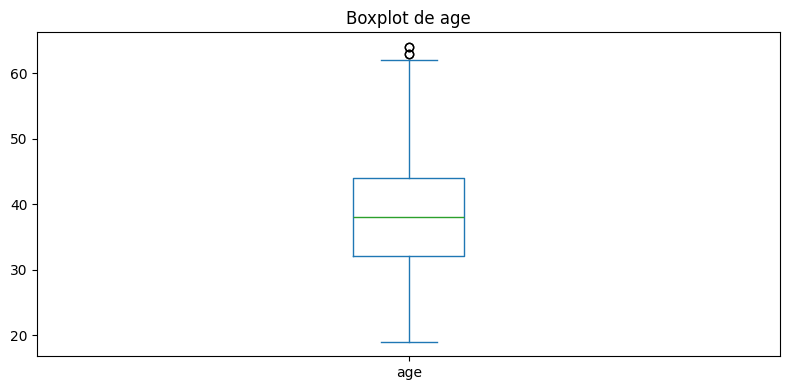

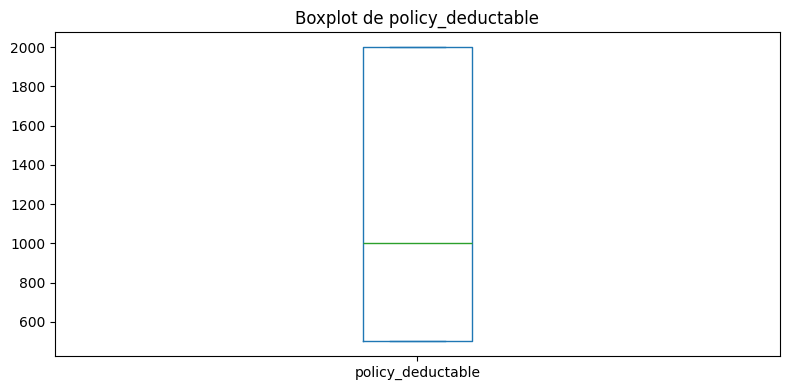

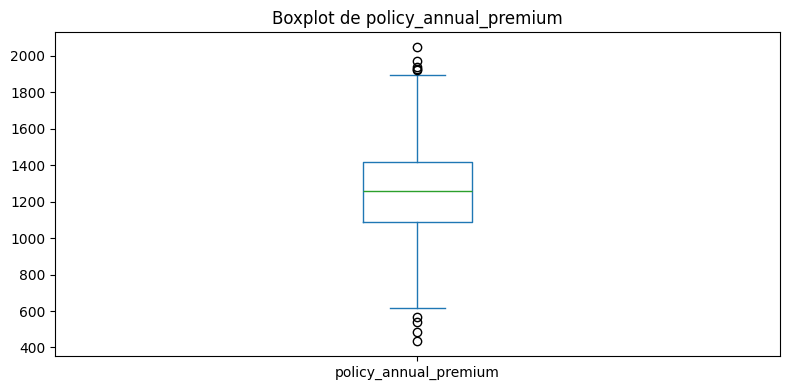

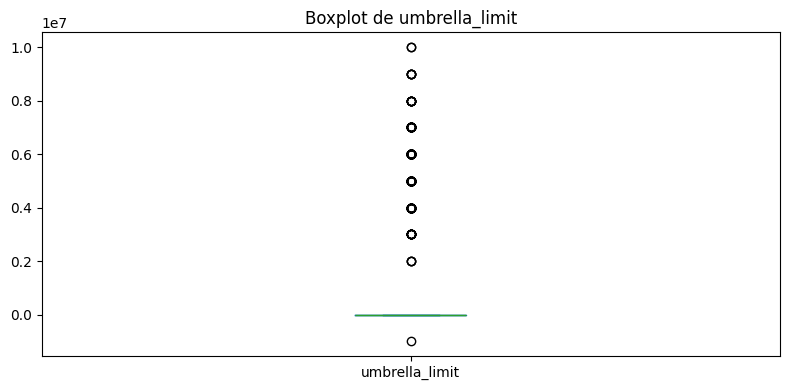

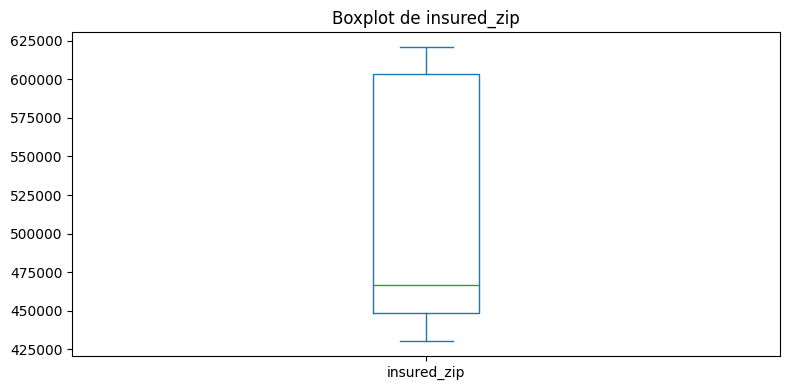

Outliers detectados en months_as_customer: 0


In [9]:
# Boxplots de algunas numéricas (hasta 6)
sel = num_cols[:6]
for col in sel:
    df_clean[[col]].plot(kind='box', title=f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()

# Detección simple por IQR en una variable ejemplo (ajustar nombre si querés)
example_col = sel[0] if sel else None
if example_col:
    q1 = df_clean[example_col].quantile(0.25)
    q3 = df_clean[example_col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    outliers = df_clean[(df_clean[example_col] < lower) | (df_clean[example_col] > upper)][example_col]
    print(f'Outliers detectados en {example_col}:', len(outliers))

## 8) Resumen: antes y después

In [10]:
print('Shape original:', df.shape)
print('Shape limpio  :', df_clean.shape)

print('\nNulos originales (Top 10):')
display(df.isna().sum().sort_values(ascending=False).head(10))

print('Nulos luego de limpieza (Top 10):')
display(df_clean.isna().sum().sort_values(ascending=False).head(10))

Shape original: (1000, 38)
Shape limpio  : (1000, 37)

Nulos originales (Top 10):


_c39                       1000
property_damage             360
police_report_available     343
collision_type              178
authorities_contacted        91
months_as_customer            0
policy_deductable             0
policy_csl                    0
policy_state                  0
policy_bind_date              0
dtype: int64

Nulos luego de limpieza (Top 10):


months_as_customer         0
age                        0
policy_state               0
policy_csl                 0
policy_deductable          0
policy_annual_premium      0
umbrella_limit             0
insured_zip                0
insured_sex                0
insured_education_level    0
dtype: int64